In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

In [3]:
# calculates  the colour background for an x and y coordinate on the graph

def getColour(x,y):
    innerColor = (0, 0, 0) #the colour of the center
    outerColor = (255, 255, 255)
    xdist = (x - imgsize[0]//2) #floor division
    ydist = (y - imgsize[1]//2)
    distanceToCenter = np.sqrt(xdist ** 2 + ydist ** 2) # pythagoras
    radians = math.atan2(xdist, ydist)
    if radians < 0:
        radians += 2*np.pi
  
    angle = math.degrees(radians)
    angle = int(angle)
  
    distanceToCenter = distanceToCenter / (np.sqrt(2) * imgsize[0]/2)
    red = cmap(angle)[0] * 256
    green = cmap(angle)[1] *256
    blue = cmap(angle)[2]*256

    #Calculate r, g, and b values
    r = red * distanceToCenter + innerColor[0] * (1 - distanceToCenter)
    g = green * distanceToCenter + innerColor[1] * (1 - distanceToCenter)
    b = blue * distanceToCenter + innerColor[2] * (1 - distanceToCenter)
    col = (int(r), int(g), int(b))
    return col

In [4]:
#generates the back groound image
from matplotlib import cm
arr = np.zeros((256,256,3), dtype=np.uint8)
imgsize = arr.shape[:2]


cmap=cm.get_cmap('hsv',360)
for x in range(imgsize[1]):
    for y in range(imgsize[0]):
        #Find the distance to the center
        
        arr[x, y] = getColour(x,y)
arr=np.rot90(arr) # rotate 90 degrees to allign graph coordinates with image coordinated


In [5]:
x = 0.5
y = 0
xD= []
yD=[]
for i in range(0,1000):
    y = 3.76995 * x *(1-x)
    xD.append(x)
    yD.append(y)
    print x,y
    x = y

0.5 0.9424875
0.9424875 0.204349432295
0.204349432295 0.612958967109
0.612958967109 0.894383962483
0.894383962483 0.35611434075
0.35611434075 0.864437912478
0.864437912478 0.441781620716
0.441781620716 0.929709708051
0.929709708051 0.246364599384
0.246364599384 0.699963161545
0.699963161545 0.791745046537
0.791745046537 0.621607556643
0.621607556643 0.88673597959
0.88673597959 0.378635991716
0.378635991716 0.886959067611
0.886959067611 0.377985290442
0.377985290442 0.886362032536
0.886362032536 0.379725875683
0.379725875683 0.887951912317
0.887951912317 0.375084818094
0.375084818094 0.883661944122
0.883661944122 0.38756410245
0.38756410245 0.894828429003
0.894828429003 0.354791923398
0.354791923398 0.862996650895
0.862996650895 0.445734124853
0.445734124853 0.931385807015
0.931385807015 0.240923501044
0.240923501044 0.689446072218
0.689446072218 0.807184694659
0.807184694659 0.586745832016
0.586745832016 0.914119231809
0.914119231809 0.295960911896
0.295960911896 0.78553713208
0.785537

0.294158334408 0.782751735362
0.782751735362 0.641085487112
0.641085487112 0.867446212936
0.867446212936 0.433481218694
0.433481218694 0.925806420273
0.925806420273 0.258953690108
0.258953690108 0.723440875524
0.723440875524 0.754269636589
0.754269636589 0.698748741349
0.698748741349 0.793570470605
0.793570470605 0.617579557215
0.617579557215 0.890368121171
0.890368121171 0.367995111363
0.367995111363 0.876795025612
0.876795025612 0.407250766427
0.407250766427 0.910056805483
0.910056805483 0.308583286694
0.308583286694 0.804355181857
0.804355181857 0.593269202357
0.593269202357 0.909692161669
0.909692161669 0.309710186537
0.309710186537 0.805976807095
0.805976807095 0.589537970661
0.589537970661 0.912263629176
0.912263629176 0.301741897287
0.301741897287 0.794304807466
0.794304807466 0.615952075506
0.615952075506 0.891800960265
0.891800960265 0.363770043809
0.363770043809 0.872522502297
0.872522502297 0.419320173166
0.419320173166 0.917948011555
0.917948011555 0.283950596859
0.28395059

In [6]:
#generate data to draw a circle
r=5
t= np.arange(0,5*2*np.pi, 0.2)
#x=r*np.sin(t);
#y=r*np.cos(t);


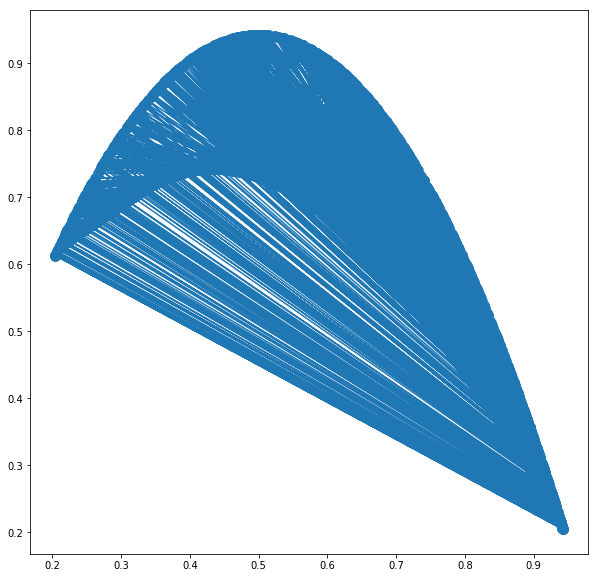

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

plt.plot(x,y,".-",markersize=20,markeredgewidth=0.5)

Text(0.5,1,'wierd little graph')

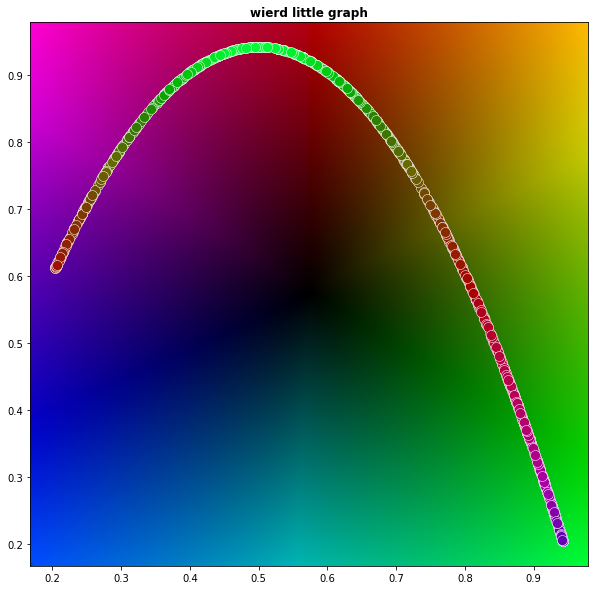

In [9]:

x = np.array(xD)
y = np.array(yD)

# rescale to data to size of background
xi = np.interp(x,(x.min(),x.max()),(0,256)) 
yi = np.interp(y,(y.min(),y.max()),(0,256))


#claculate colour of data point
coli = []
for i in range(0,len(xi)):
    col = getColour(xi[i],yi[i])
    col = [float(z)/256 for z in col]
    coli.append(col)
coli.append([0.0,0.0,0.0])   # add a black colour as the last colour incase you over step array

fig, ax = plt.subplots()
fig.set_size_inches(10,10)

#step through datapoints setting their colour from the colour array using the correct offsett
for i in range(0,len(x)-1): # reduce the range by 1 to prevent stepping past the end of the array is (i+1)
    plt.plot(x[i],y[i],".",color = coli[i +1], markersize=20,markeredgecolor=(1, 1, 1, 1),markeredgewidth=0.5)
scale_factor = 5

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()


plotlim = plt.xlim() + plt.ylim() 


ax.imshow(arr, cmap=plt.cm.Greens, interpolation='bicubic', extent=plotlim,aspect = 'auto')  
plt.draw()  
plt.title('wierd little graph', fontweight ="bold")
